# Programming Assignment 4: Image Classification using Bag_of_Features

## Setup

In [1]:
# Set up parameters, image paths and category list
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from PA4_utils import *
import Bag_of_Features_code as bfc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['airplanes', 'helicopter','car_side', 'motorbike','grand_piano',  
              'sunflower','umbrella','butterfly'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Apl', 'Hel', 'Car', 'Mbk', 'Pno', 'Sfl', 'Umb', 'Bfy'];

# Number of training examples per category to use. Max is 100. 
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 800 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

## Bag of SIFT features with Nearest Neighbor classifier

### Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [2]:
print('Using the BAG-OF-SIFT representation for images')

vocab_filename = 'vocab_200.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
    km = bfc.build_vocabulary(train_image_paths, vocab_size)
    vocab = km.cluster_centers_
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))

Using the BAG-OF-SIFT representation for images
No existing visual word vocabulary found. Computing one from training images
vocab_200.pkl saved


In [3]:
train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename, km, vocab_size)
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename, km, vocab_size)

### Classify each test image by training and using the Nearest Neighbor classifier

In [4]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories_knn_1, knn_1 = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k=1)
predicted_categories_knn_5, knn_5 = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k=5)
predicted_categories_knn_10, knn_10 = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k=10)
predicted_categories_knn_20, knn_20 = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, k=20)

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


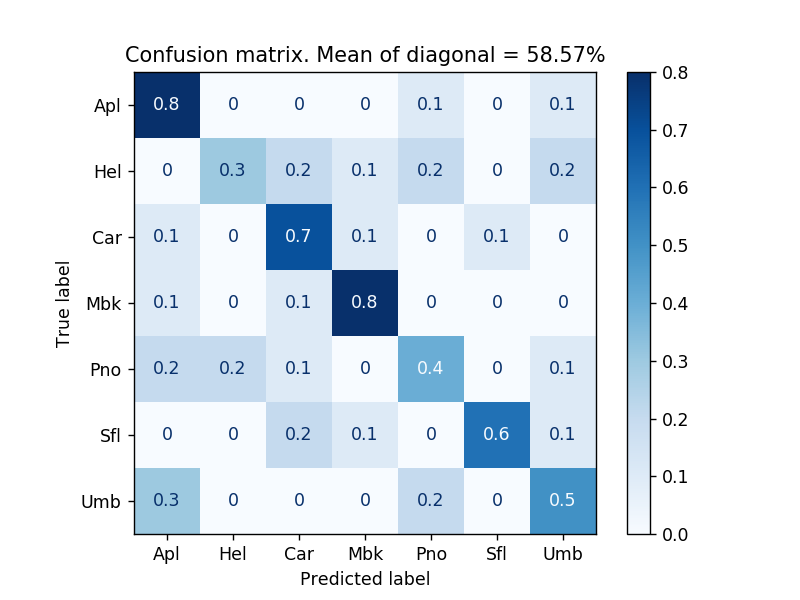

In [5]:
plotconfmat(knn_1, test_image_feats, test_labels, predicted_categories_knn_1, categories, abbr_categories)

<IPython.core.display.Javascript object>


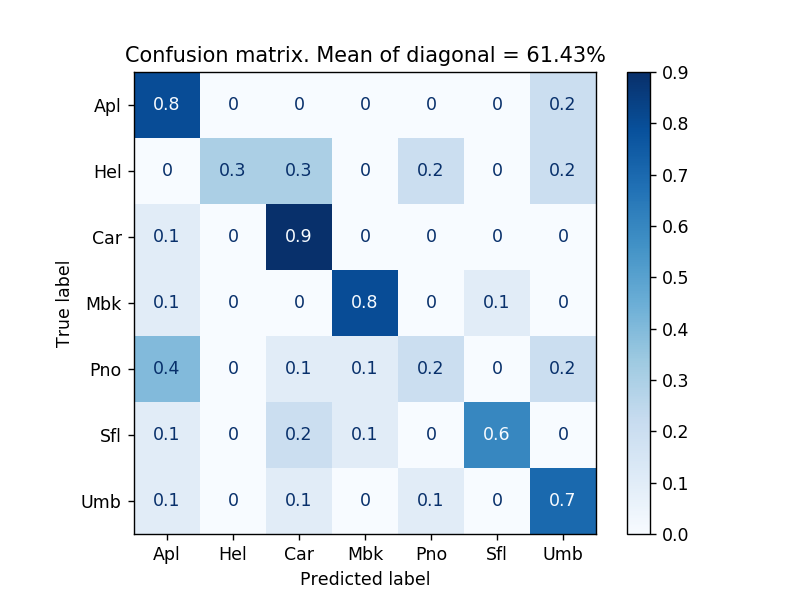

In [6]:
plotconfmat(knn_5, test_image_feats, test_labels, predicted_categories_knn_5, categories, abbr_categories)

<IPython.core.display.Javascript object>


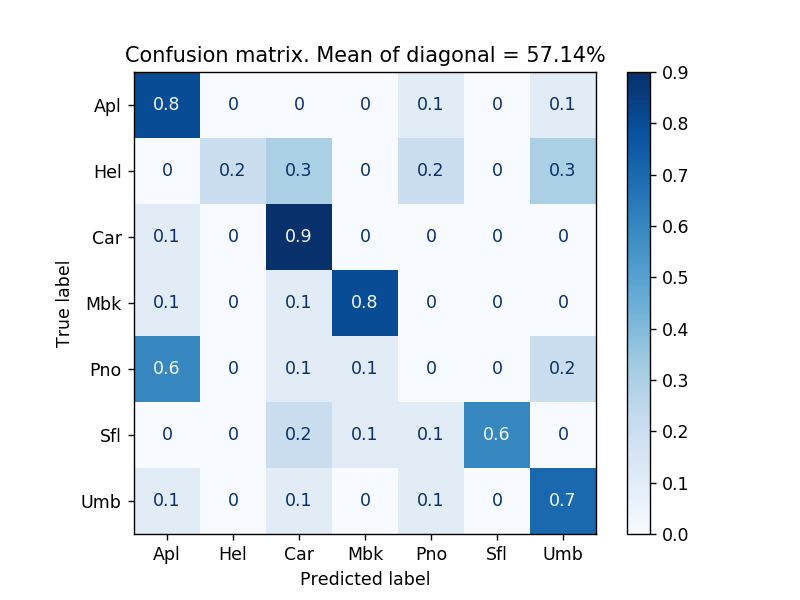

In [7]:
plotconfmat(knn_10, test_image_feats, test_labels, predicted_categories_knn_10, categories, abbr_categories)

<IPython.core.display.Javascript object>


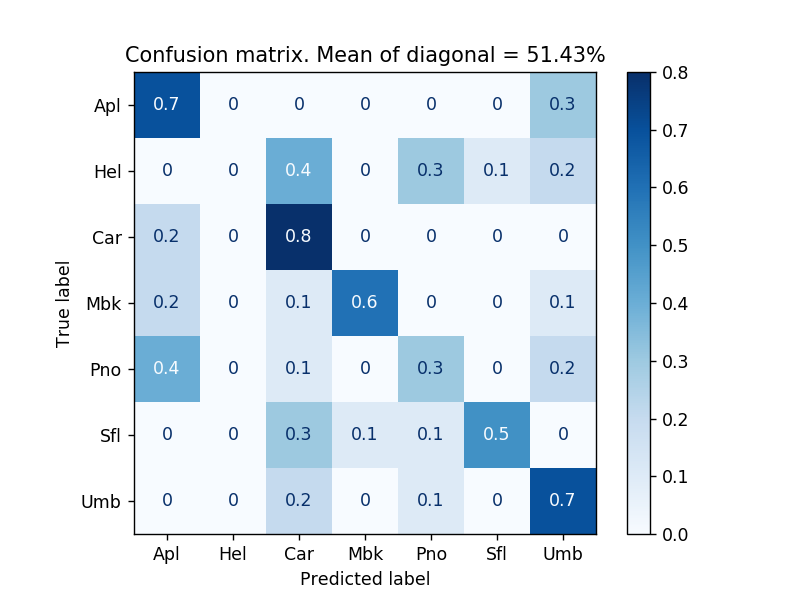

In [8]:
plotconfmat(knn_20, test_image_feats, test_labels, predicted_categories_knn_20, categories, abbr_categories)

## Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from before.

The difference is that this time we will classify them with a support vector machine (SVM).

### Classify each test image by training and using the SVM classifiers

In [9]:
print('Using SVM classifier to predict test set categories')
predicted_categories_svm_10, svm_10 = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, lam = 10, max_iter=3000)
predicted_categories_svm_100, svm_100 = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, lam = 100, max_iter=3000)
predicted_categories_svm_500, svm_500 = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, lam = 500, max_iter=3000)

Using SVM classifier to predict test set categories


### Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


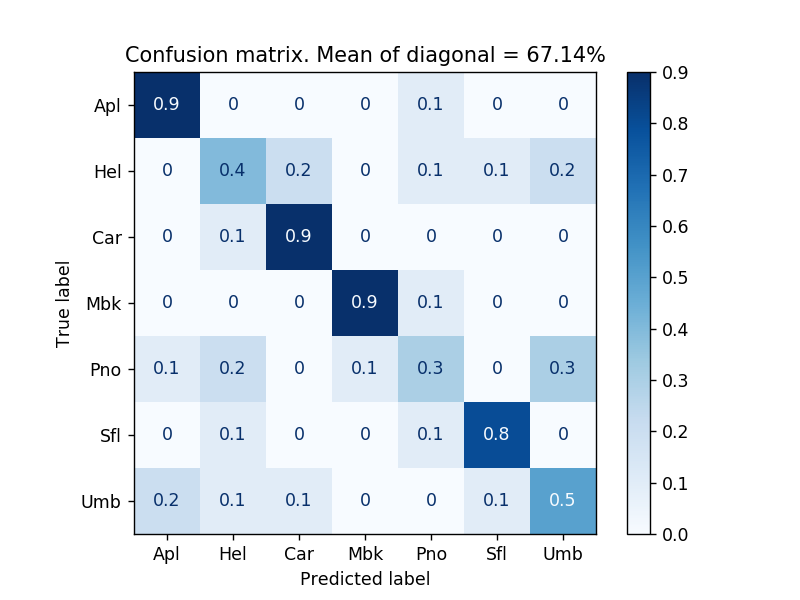

In [10]:
plotconfmat(svm_10, test_image_feats, test_labels, predicted_categories_svm_10, categories, abbr_categories)

<IPython.core.display.Javascript object>


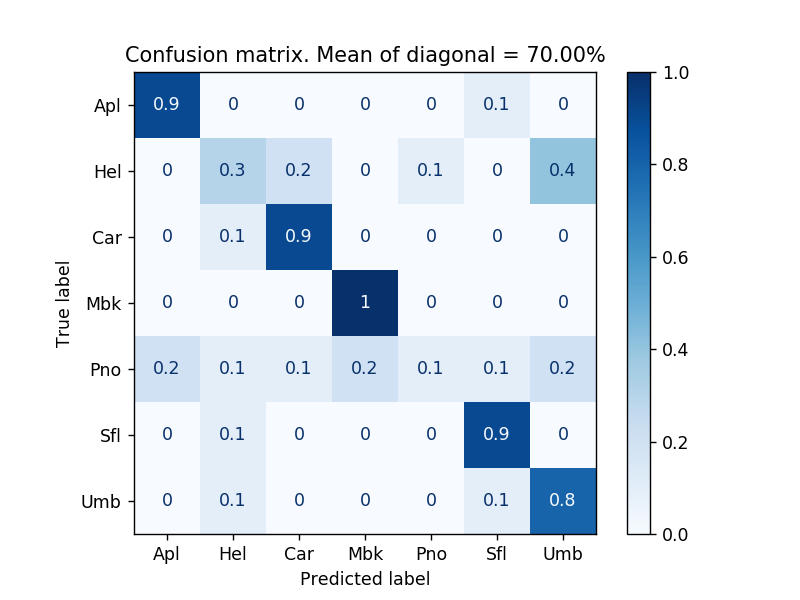

In [11]:
plotconfmat(svm_100, test_image_feats, test_labels, predicted_categories_svm_100, categories, abbr_categories)

<IPython.core.display.Javascript object>


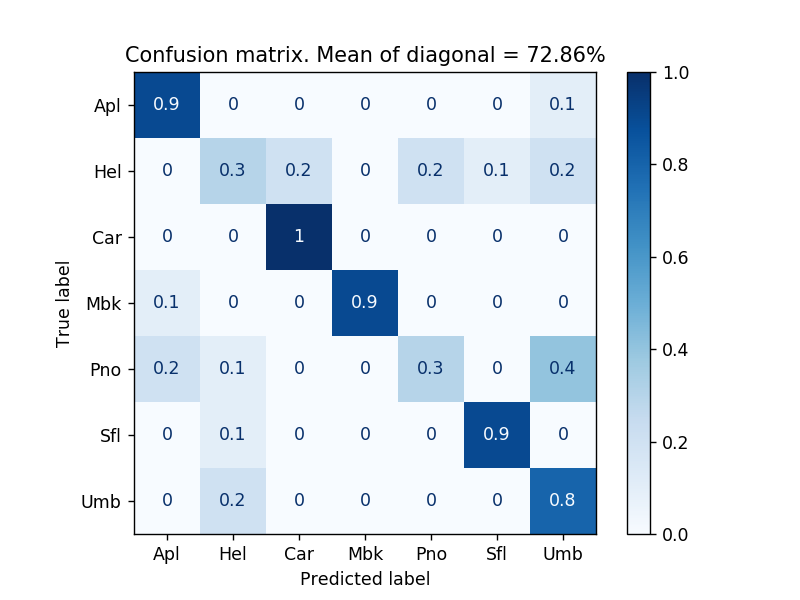

In [12]:
plotconfmat(svm_500, test_image_feats, test_labels, predicted_categories_svm_500, categories, abbr_categories)